In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 10 10:47:28 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
section 4.2 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution

In [3]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=50)

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=221.71975336133733, L=-843291.5480682896, U=-3786.3347787573452
k=1, rel_gap=0.16928075317564373, L=-4427.288381880523, U=-3786.3347787573452
k=2, rel_gap=0.08593902373512846, L=-4420.322065342829, U=-4070.50669395687
k=3, rel_gap=0.05621901443178214, L=-4417.314086604383, U=-4182.195194602496
k=4, rel_gap=0.04532447044596578, L=-4413.113853167075, U=-4221.764607963604
k=5, rel_gap=0.04135780379198792, L=-4410.2884629754535, U=-4235.13267669948
k=6, rel_gap=0.03937793125499737, L=-4407.5328415741005, U=-4240.548802351636
k=7, rel_gap=0.03559366138949491, L=-4393.922082045432, U=-4242.901676464437
k=8, rel_gap=0.033118448623293564, L=-4389.46614358224, U=-4248.754002439437
k=9, rel_gap=0.03175092724310908, L=-4386.602778071404, U=-4251.610211577546
k=10, rel_gap=0.030174753928668453, L=-4379.901503512512, U=-4251.610211577546
k=11, rel_gap=0.028601261742550333, L=-4373.211628066175, U=-4251.610211577546
k=12, rel_gap=0.027293596625838103, L=-4369.238187770795, U=-4253.15430

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:154: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


k=15, rel_gap=0.023105076222419592, L=-4355.840276487608, U=-4257.471082609176


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:160: UserWarning: Constraint #0 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


k=16, rel_gap=0.02150961244376953, L=-4354.369896103095, U=-4262.6812739295565
k=17, rel_gap=0.020140000468940465, L=-4351.521624649852, U=-4265.612193080885
k=18, rel_gap=0.019252587650109728, L=-4348.929341342241, U=-4266.782732795128
k=19, rel_gap=0.017861847255414287, L=-4345.491517969556, U=-4269.235092843727
k=20, rel_gap=0.016851640822739086, L=-4344.616387190507, U=-4272.615800349458
k=21, rel_gap=0.016425781814978006, L=-4343.659229991935, U=-4273.464238811112
k=22, rel_gap=0.015937962878689056, L=-4342.634673770834, U=-4274.50772827295
k=23, rel_gap=0.015824198615047934, L=-4342.148387546698, U=-4274.50772827295
k=24, rel_gap=0.015258986285115418, L=-4340.2507843763, U=-4275.018338185313
k=25, rel_gap=0.015025611110270514, L=-4339.770379998459, U=-4275.527959586622
k=26, rel_gap=0.014712718990097209, L=-4339.299602517357, U=-4276.38239011736
k=27, rel_gap=0.014269617278309764, L=-4338.2470056598995, U=-4277.212815761107
k=28, rel_gap=0.013865996594413899, L=-4337.985113818168

# Centralized solution

In [5]:
h_cvx, x_cvx = ob.cvx_resource_allocation(params=params, R=R)

In [6]:
h_cvx, prob.upper_bnd[-1]

(-4306.251974907458, -4286.884814422253)

# Plot

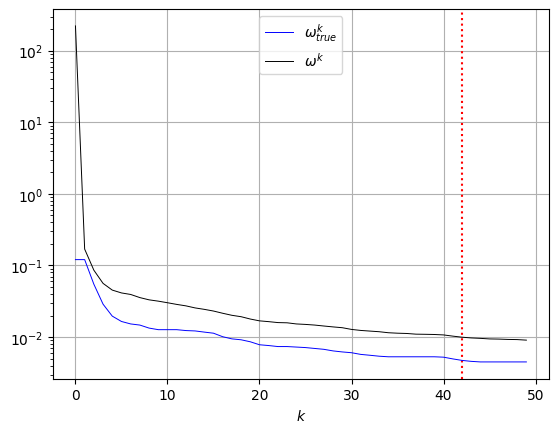

In [7]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)